In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision


import numpy as np
import matplotlib.pyplot as plt

from data.EuroNotes import EuroNotes
from models.ResNet18 import pretrained_res18

In [2]:
# # # # # # # # # # # # # # # #
# Load Classifier Models
# # # # # # # # # # # # # # # #


print('Loading base classifier model and robust model')
model_base = pretrained_res18()
model_robust = pretrained_res18()
print('Loaded')

Loading base classifier model and robust model
Loaded


In [3]:
means = np.array([ 0.14588552,  0.26887908,  0.14538361])
stds = np.array([ 0.20122388,  0.2800698 ,  0.20029236])
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize(means, stds)])

train_set = EuroNotes('../data-augmentation/banknotes_augmented/train', transform=transformations, resize=False)
val_set = EuroNotes('../data-augmentation/banknotes_augmented/val', transform=transformations, resize=False)

train_loader = DataLoader(train_set, batch_size=25, shuffle=True, num_workers=16)
val_loader = DataLoader(val_set, batch_size=25, shuffle=True, num_workers=16)

0
Variable containing:
 -7.7782 -13.7434  15.5838 -17.0990
-16.0495   3.8859 -18.1121   0.2058
[torch.FloatTensor of size 2x4]

1
Variable containing:
 -9.8129   8.3872 -17.2499 -10.0971
-12.0722 -18.0310  12.3525  -6.9743
[torch.FloatTensor of size 2x4]

2
Variable containing:
-18.0892   8.1043 -17.0893  -5.1526
 -1.6606 -17.6047  11.3179 -12.0124
[torch.FloatTensor of size 2x4]

3
Variable containing:
-15.7587   5.5652 -19.0988   0.3805
 -5.1991 -16.9292  13.0511 -16.3397
[torch.FloatTensor of size 2x4]



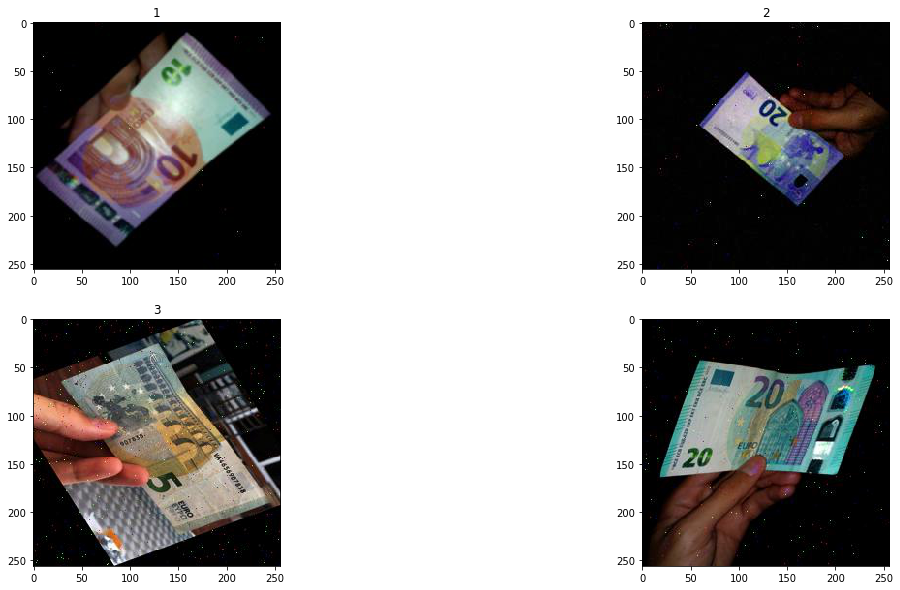

In [15]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(20,10))

for i_batch, data in enumerate(train_loader):
    if i_batch > 3:
        break
    images = Variable(data['image'])
    preds = model_base(images[0:2, :, :, :])
    print(i_batch)
    print(preds)
    plt.title(i_batch)
    im = images[1, :, :, :].data.numpy() * stds.reshape((3, 1, 1))
    
    im = im + means.reshape((3, 1, 1))
    im = im.astype(float)
    im = im.astype(float)
    im -= np.min(im)
    im /= np.max(im)
    im = np.swapaxes(np.swapaxes(im, 0, 2).reshape((256, 256, 3)), 0, 1)
    ax = plt.subplot(gs[int(i_batch/2), i_batch % 2])
    plt.imshow(im)
plt.show()
    

In [5]:
from attackers.BlackBoxAttacker import GANAttack

In [6]:
ganatt = GANAttack((3, 256, 256), 0.01)

Loading pre-trained GANAttack


In [7]:
images.shape

torch.Size([25, 3, 256, 256])

In [8]:
preds = model_base(images)
print(preds.shape)

torch.Size([25, 4])


In [9]:
np.random.uniform(-1, 0.1, (3, 2))

array([[-0.15255617, -0.36427358],
       [-0.48721753, -0.40890562],
       [-0.40545826, -0.73103946]])